<a href="https://colab.research.google.com/github/Vince501/final_banana/blob/cobal_Final/project_banana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
! ls -l

total 8
drwx------ 6 root root 4096 Nov 24 12:15 drive
drwxr-xr-x 1 root root 4096 Nov 22 00:14 sample_data


In [4]:
cd "/content/drive/MyDrive/project/"

/content/drive/MyDrive/project


In [5]:
!ls

content  model1.tflite	models_saved  pictures		    venv
logs	 model3.tf	model.tflite  project_banana.ipynb


In [6]:
os.getcwd()

'/content/drive/MyDrive/project'

In [7]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 31.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [8]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 28.5 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing i

In [10]:
import keras

In [11]:
import tensorflow

In [12]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [13]:
data_dir = 'pictures/trainData'

os.listdir(data_dir)

['unripe', 'rotten', 'ripe', 'over_ripe']

In [14]:
data_dir = 'pictures/validationData'

os.listdir(data_dir)

['over_ripe', 'ripe', 'rotten', 'unripe']

In [15]:
SIZE = 128

train_images = []
train_labels = []
for directory_path in glob.glob("pictures/trainData/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
train_images = np.array(train_images)
train_labels = np.array(train_labels)

pictures/trainData/unripe
pictures/trainData/unripe/musa-acuminata-freshunripe-6d3c52a0-1d0a-11ec-be7c-d8c4975e38aa_jpg.rf.c3ac7b14be7fee9a4c25a90be8c7d133.jpg
pictures/trainData/unripe/musa-acuminata-unripe-5918b956-2653-11ec-96f0-d8c4975e38aa---Copy_jpg.rf.445f805ed114321ea957329d59880c98.jpg
pictures/trainData/unripe/musa-acuminata-freshunripe-704cfe1e-1d0a-11ec-97bf-d8c4975e38aa_jpg.rf.ea4f0e48b3d05181d9d93df03f41d347.jpg
pictures/trainData/unripe/musa-acuminata-unripe-628e48c5-2653-11ec-99c3-d8c4975e38aa---Copy_jpg.rf.f49dde5c88f7ae9e0ff83ab288db2f58.jpg
pictures/trainData/unripe/musa-acuminata-unripe-5207b524-2653-11ec-8619-d8c4975e38aa---Copy_jpg.rf.0c09c84319e1df381b290c2c54c45cb6.jpg
pictures/trainData/unripe/musa-acuminata-freshunripe-667f26d2-1d0a-11ec-a0b5-d8c4975e38aa_jpg.rf.4081a315d73758da38667e3909841f9f.jpg
pictures/trainData/unripe/musa-acuminata-freshunripe-389cf809-2653-11ec-b05c-d8c4975e38aa_jpg.rf.5f3176886bb7294e0a593fd86f7132fc.jpg
pictures/trainData/unripe/musa

In [16]:
# test
test_images = []
test_labels = []
for directory_path in glob.glob("pictures/validationData/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [17]:
test_images.shape

(648, 128, 128, 3)

In [18]:
import sklearn
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [19]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [20]:
#One hot encode y values for neural network.
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [21]:
activation = 'relu'

#feature_extractor instead of model
feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

In [22]:
#Add layers for deep learning prediction
x = feature_extractor.output
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(4, activation = 'softmax')(x)
#because of 4 classes

In [23]:
# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0     

In [24]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.11.0'

In [25]:
#Train the CNN model
## checkpointing
checkpoint_path = "models_saved/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

In [26]:
history = cnn_model.fit(x_train, y_train_one_hot, epochs=40, validation_data = (x_test, y_test_one_hot),callbacks=[cp_callback])

Epoch 1/40
143/143 [==============================] - ETA: 0s - loss: 3.4974 - accuracy: 0.7527
Epoch 1: saving model to models_saved/cp.ckpt
143/143 [==============================] - 20s 53ms/step - loss: 3.4974 - accuracy: 0.7527 - val_loss: 45.7397 - val_accuracy: 0.2299
Epoch 2/40
143/143 [==============================] - ETA: 0s - loss: 0.5748 - accuracy: 0.8177
Epoch 2: saving model to models_saved/cp.ckpt
143/143 [==============================] - 6s 44ms/step - loss: 0.5748 - accuracy: 0.8177 - val_loss: 2.4319 - val_accuracy: 0.6219
Epoch 3/40
142/143 [============================>.] - ETA: 0s - loss: 0.4239 - accuracy: 0.8625
Epoch 3: saving model to models_saved/cp.ckpt
143/143 [==============================] - 6s 44ms/step - loss: 0.4242 - accuracy: 0.8624 - val_loss: 1.1737 - val_accuracy: 0.6914
Epoch 4/40
143/143 [==============================] - ETA: 0s - loss: 0.3367 - accuracy: 0.8872
Epoch 4: saving model to models_saved/cp.ckpt
143/143 [=========================

In [27]:
#Saving entire model
cnn_model.save('models_saved/GPU_model.h5')

In [28]:
from keras.models import load_model
new_model = load_model('models_saved/GPU_model.h5')

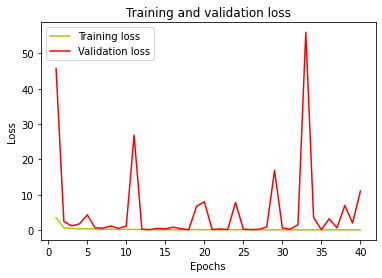

In [31]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

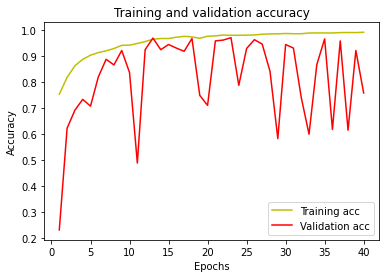

In [32]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

21/21 [==============================] - 0s 15ms/step


[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [143   0   1   0   0   0   0   0]
 [ 62  64  19  25   0   0   0   0]
 [ 16   0 141  34   0   0   0   0]
 [  0   0   0 143   0   0   0   0]]


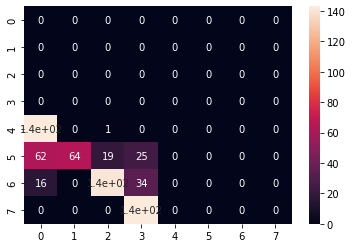

In [34]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)

1/1 [==============================] - 0s 31ms/step
The prediction for this image is:  ['pictures/trainData/over_ripe']
The actual label for this image is:  pictures/validationData/over_ripe


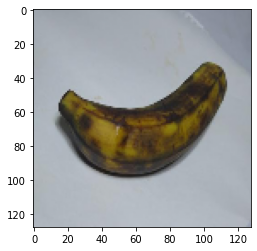

In [37]:
n=135  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])


In [38]:
!pip install tf-nightly scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 551.1/551.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.4/439.4 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.1 MB/s eta 0:00:00


In [39]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)

In [40]:
tflite_model = converter.convert()

with open("model1.tflite", 'wb') as f:
    f.write(tflite_model)

Random Forest (Extra Work; Trying out)